In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv("Medical_cost_traindata.csv")
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [ ]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
df.tail()

,age,sex,bmi,smoker,region,children,charges
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452
3629,37.598865,female,25.219233,no,northeast,3,7027.698968


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

Text(0.5, 1.0, 'Age vs Charges')

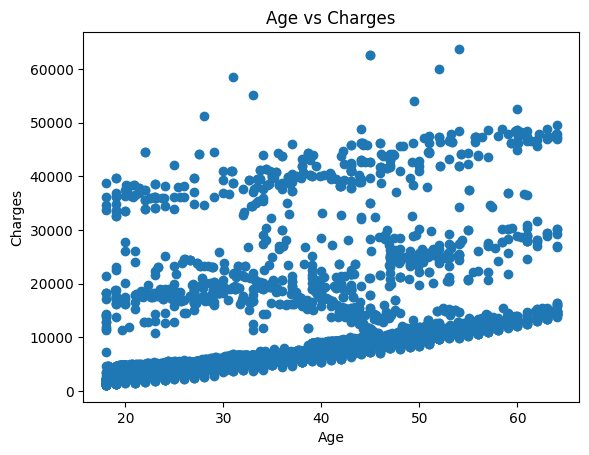

In [ ]:
x=df.age
y=df.charges
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")

In [ ]:
import seaborn as sb

<AxesSubplot: xlabel='sex', ylabel='count'>

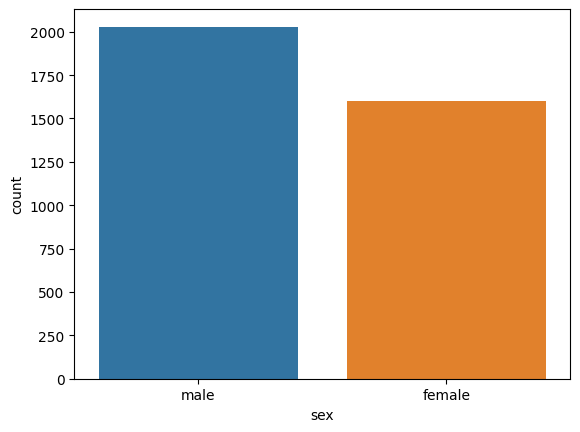

In [ ]:
sb.countplot(x="sex",data=df)

<AxesSubplot: xlabel='smoker', ylabel='count'>

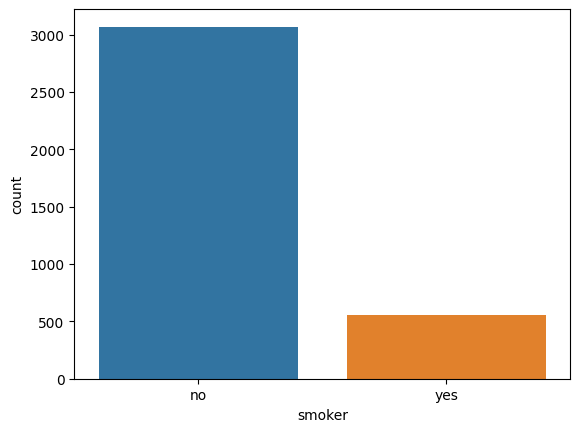

In [ ]:
sb.countplot(x="smoker",data=df)


<AxesSubplot: xlabel='region', ylabel='count'>

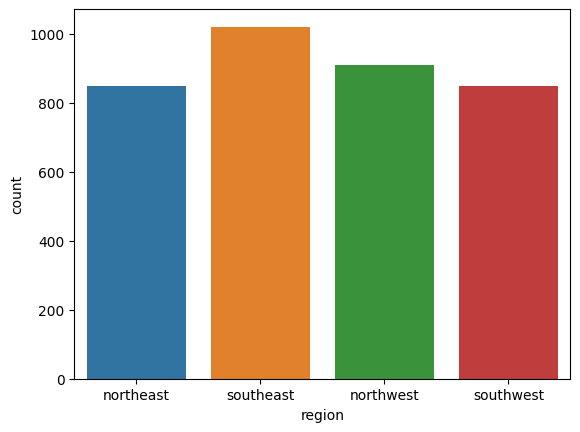

In [ ]:
sb.countplot(x="region",data=df)

In [ ]:
X=df.drop(["charges","region"],axis="columns")
Y=df.charges

In [ ]:
X.head()

,age,sex,bmi,smoker,children
0,21.000000,male,25.745000,no,2
1,36.976978,female,25.744165,yes,3
2,18.000000,male,30.030000,no,1
3,37.000000,male,30.676891,no,3
4,58.000000,male,32.010000,no,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
l1=le.fit_transform(df.sex)
df["sex_le"]=l1

In [ ]:
l2=le.fit_transform(df.smoker)
df["smoker_le"]=l2

In [ ]:
df.head()

,age,sex,bmi,smoker,region,children,charges,sex_le,smoker_le
0,21.000000,male,25.745000,no,northeast,2,3279.868550,1,0
1,36.976978,female,25.744165,yes,southeast,3,21454.494239,0,1
2,18.000000,male,30.030000,no,southeast,1,1720.353700,1,0
3,37.000000,male,30.676891,no,northeast,3,6801.437542,1,0
4,58.000000,male,32.010000,no,southeast,1,11946.625900,1,0


In [ ]:
dff=df.drop(['sex','smoker'],axis=1)
dff.head()

,age,bmi,region,children,charges,sex_le,smoker_le
0,21.000000,25.745000,northeast,2,3279.868550,1,0
1,36.976978,25.744165,southeast,3,21454.494239,0,1
2,18.000000,30.030000,southeast,1,1720.353700,1,0
3,37.000000,30.676891,northeast,3,6801.437542,1,0
4,58.000000,32.010000,southeast,1,11946.625900,1,0


In [69]:
X=dff.drop(['charges','region'],axis='columns')
Y=dff.charges

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [72]:
len(X_train)

2541

In [73]:
len(X_test)

1089

In [74]:
model=RandomForestRegressor()

In [75]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [76]:
model.score(X_test,Y_test)

0.8646967983857868

In [77]:
model.predict([[48.2111,36.86,4,0,0]])

C:\Users\saite\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10789.73547951])

In [78]:
model.score(X_train,Y_train)

0.9826139286718709

Saving the trained model


In [ ]:
import pickle
filename="Trained_model_Medical"
pickle.dump(model,open(filename,"wb"))

In [85]:
loaded_model=pickle.load(open("Trained_model_Medical","rb"))

In [87]:
inputdata=([[18.000000,36.86,4,0,0]])
predicted=loaded_model.predict(inputdata)
print(predicted)

[4804.36346512]


C:\Users\saite\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
